C:\Users\user\AppData\Local\Temp\ipykernel_12544\2107722387.py:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



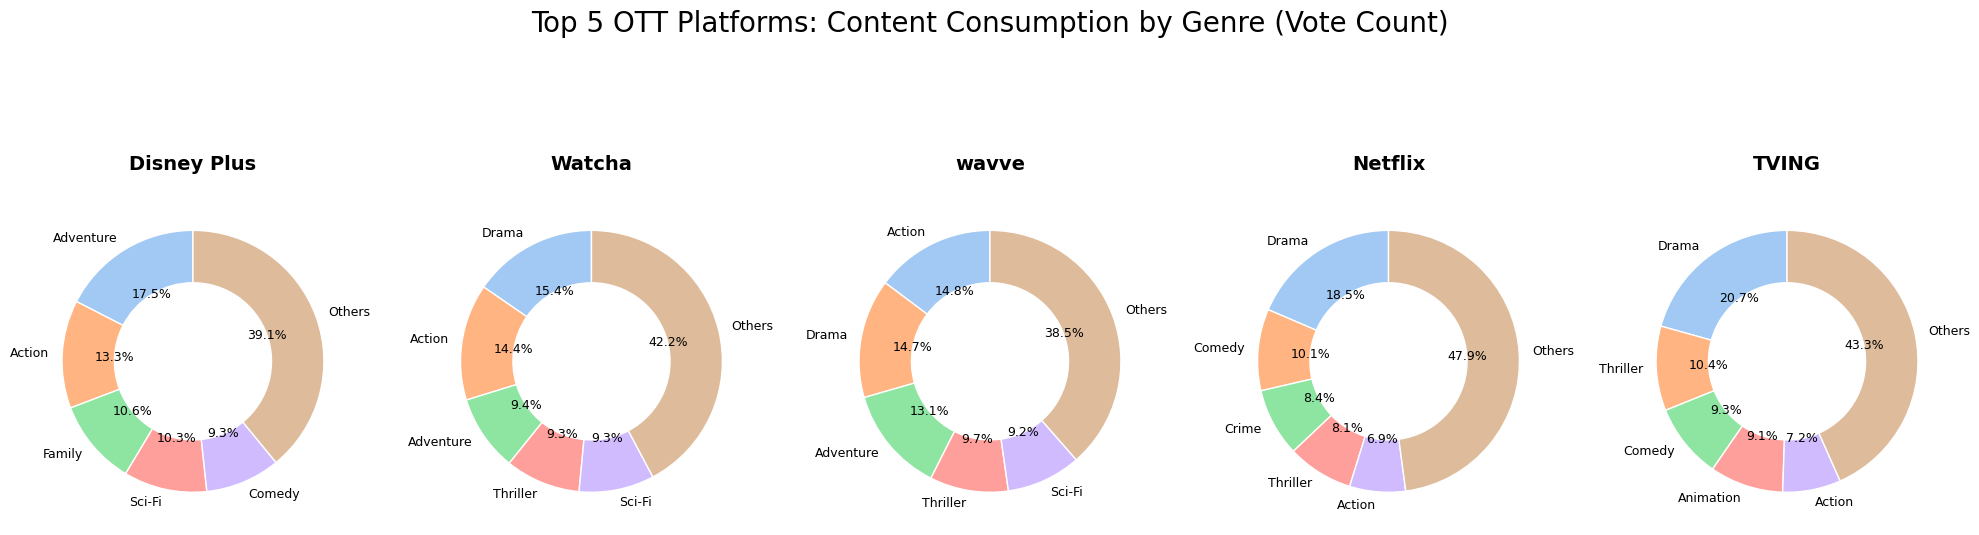

In [56]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# 데이터 로드
file_path = 'data/tmdb_cleaned.csv'
df = pd.read_csv(file_path)

# 결측치 제거
df = df.dropna(subset=['genres', 'providers'])

# 1. Providers 분리 (쉼표로 구분된 문자열을 리스트로 변환 후 폭파)
df['providers'] = df['providers'].apply(lambda x: [p.strip() for p in x.split(',')])
df_exploded_p = df.explode('providers')

# 2. Genres 분리
df_exploded_p['genres'] = df_exploded_p['genres'].apply(lambda x: [g.strip() for g in str(x).split(',')])
df_final = df_exploded_p.explode('genres')

# 3. 주요 플랫폼 5개 선정 (투표수 총합 기준, '기타' 제외)
platform_votes = df_final.groupby('providers')['vote_count'].sum().sort_values(ascending=False)
top_platforms = [p for p in platform_votes.index if p != '기타'][:5]

# 4. 시각화 준비 (Top 5 플랫폼 데이터만 필터링)
df_viz = df_final[df_final['providers'].isin(top_platforms)]

# 한글 폰트 깨짐 방지를 위한 장르 영문 매핑 (주요 장르만)
genre_map = {
    '액션': 'Action', '모험': 'Adventure', '애니메이션': 'Animation', '코미디': 'Comedy',
    '범죄': 'Crime', '다큐멘터리': 'Documentary', '드라마': 'Drama', '가족': 'Family',
    '판타지': 'Fantasy', '역사': 'History', '공포': 'Horror', '음악': 'Music',
    '미스터리': 'Mystery', '로맨스': 'Romance', 'SF': 'Sci-Fi', 'TV 영화': 'TV Movie',
    '스릴러': 'Thriller', '전쟁': 'War', '서부': 'Western', 'Kids': 'Kids',
    'Sci-Fi & Fantasy': 'Sci-Fi & Fantasy', 'Action & Adventure': 'Action & Adventure'
}
df_viz['genres_en'] = df_viz['genres'].map(genre_map).fillna(df_viz['genres'])

# 서브플랏 설정
fig, axes = plt.subplots(1, 5, figsize=(20, 6))
plt.subplots_adjust(wspace=0.3)

colors = sns.color_palette('pastel')

for i, platform in enumerate(top_platforms):
    # 해당 플랫폼 데이터 추출
    platform_data = df_viz[df_viz['providers'] == platform]
    
    # 장르별 투표수 집계
    genre_counts = platform_data.groupby('genres_en')['vote_count'].sum().sort_values(ascending=False)
    
    # Top 5 장르와 기타 설정
    if len(genre_counts) > 5:
        top_genres = genre_counts[:5]
        others = pd.Series([genre_counts[5:].sum()], index=['Others'])
        final_counts = pd.concat([top_genres, others])
    else:
        final_counts = genre_counts
        
    # 도넛 차트 그리기
    wedges, texts, autotexts = axes[i].pie(
        final_counts, 
        labels=final_counts.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=colors, 
        wedgeprops=dict(width=0.4, edgecolor='w'), # 도넛 모양 설정
        textprops={'fontsize': 9}
    )
    
    axes[i].set_title(f'{platform}', fontsize=14, fontweight='bold', pad=20)

plt.suptitle('Top 5 OTT Platforms: Content Consumption by Genre (Vote Count)', fontsize=20, y=1.05)
plt.tight_layout()
plt.show()

In [57]:
%pip install plotly

Note: you may need to restart the kernel to use updated packages.


'data/tmdb_cleaned.csv'

C:\Users\user\AppData\Local\Temp\ipykernel_25104\2107722387.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_viz['genres_en'] = df_viz['genres'].map(genre_map).fillna(df_viz['genres'])


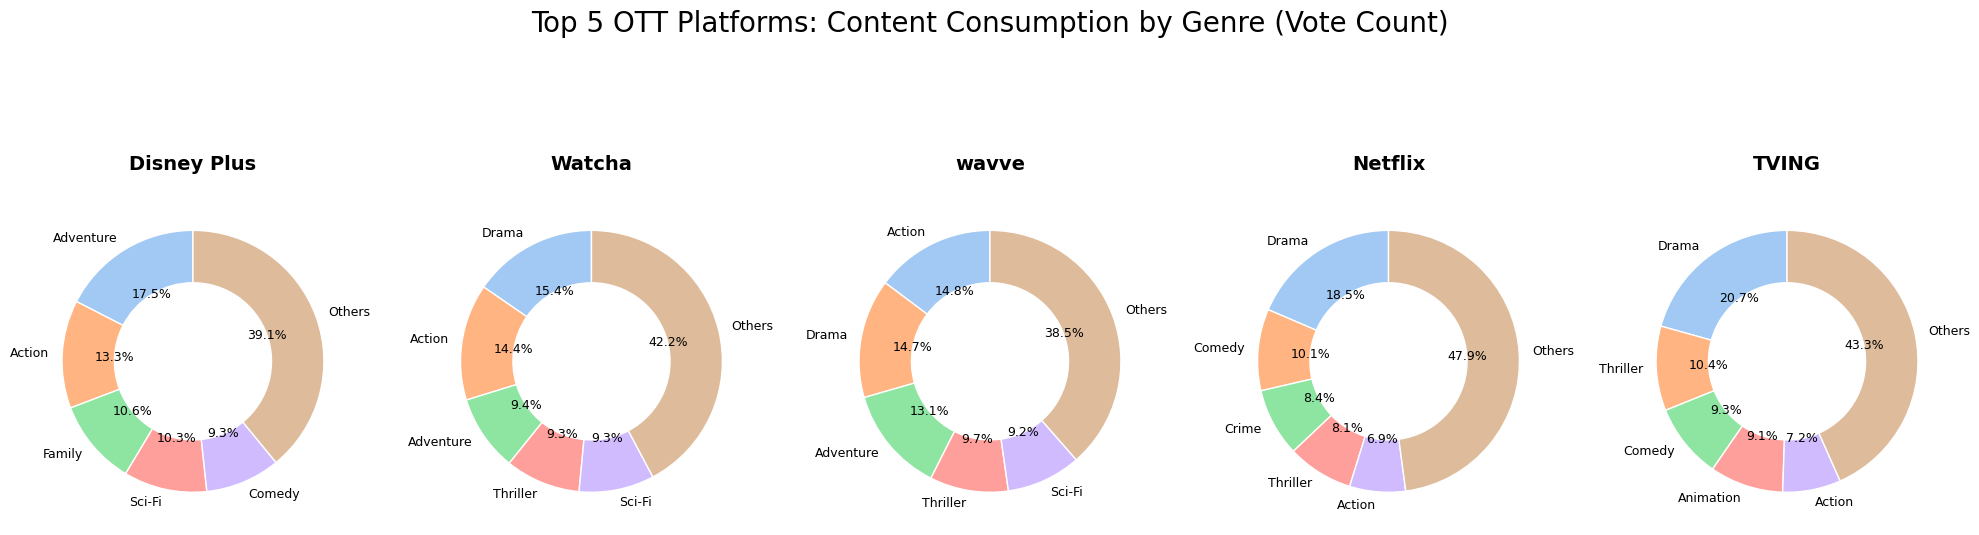

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# 데이터 로드
file_path = 'data/tmdb_cleaned.csv'
df = pd.read_csv(file_path)

# 결측치 제거
df = df.dropna(subset=['genres', 'providers'])

# 1. Providers 분리 (쉼표로 구분된 문자열을 리스트로 변환 후 폭파)
df['providers'] = df['providers'].apply(lambda x: [p.strip() for p in x.split(',')])
df_exploded_p = df.explode('providers')

# 2. Genres 분리
df_exploded_p['genres'] = df_exploded_p['genres'].apply(lambda x: [g.strip() for g in str(x).split(',')])
df_final = df_exploded_p.explode('genres')

# 3. 주요 플랫폼 5개 선정 (투표수 총합 기준, '기타' 제외)
platform_votes = df_final.groupby('providers')['vote_count'].sum().sort_values(ascending=False)
top_platforms = [p for p in platform_votes.index if p != '기타'][:5]

# 4. 시각화 준비 (Top 5 플랫폼 데이터만 필터링)
df_viz = df_final[df_final['providers'].isin(top_platforms)]

# 한글 폰트 깨짐 방지를 위한 장르 영문 매핑 (주요 장르만)
genre_map = {
    '액션': 'Action', '모험': 'Adventure', '애니메이션': 'Animation', '코미디': 'Comedy',
    '범죄': 'Crime', '다큐멘터리': 'Documentary', '드라마': 'Drama', '가족': 'Family',
    '판타지': 'Fantasy', '역사': 'History', '공포': 'Horror', '음악': 'Music',
    '미스터리': 'Mystery', '로맨스': 'Romance', 'SF': 'Sci-Fi', 'TV 영화': 'TV Movie',
    '스릴러': 'Thriller', '전쟁': 'War', '서부': 'Western', 'Kids': 'Kids',
    'Sci-Fi & Fantasy': 'Sci-Fi & Fantasy', 'Action & Adventure': 'Action & Adventure'
}
df_viz['genres_en'] = df_viz['genres'].map(genre_map).fillna(df_viz['genres'])

# 서브플랏 설정
fig, axes = plt.subplots(1, 5, figsize=(20, 6))
plt.subplots_adjust(wspace=0.3)

colors = sns.color_palette('pastel')

for i, platform in enumerate(top_platforms):
    # 해당 플랫폼 데이터 추출
    platform_data = df_viz[df_viz['providers'] == platform]
    
    # 장르별 투표수 집계
    genre_counts = platform_data.groupby('genres_en')['vote_count'].sum().sort_values(ascending=False)
    
    # Top 5 장르와 기타 설정
    if len(genre_counts) > 5:
        top_genres = genre_counts[:5]
        others = pd.Series([genre_counts[5:].sum()], index=['Others'])
        final_counts = pd.concat([top_genres, others])
    else:
        final_counts = genre_counts
        
    # 도넛 차트 그리기
    wedges, texts, autotexts = axes[i].pie(
        final_counts, 
        labels=final_counts.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=colors, 
        wedgeprops=dict(width=0.4, edgecolor='w'), # 도넛 모양 설정
        textprops={'fontsize': 9}
    )
    
    axes[i].set_title(f'{platform}', fontsize=14, fontweight='bold', pad=20)

plt.suptitle('Top 5 OTT Platforms: Content Consumption by Genre (Vote Count)', fontsize=20, y=1.05)
plt.tight_layout()
plt.show()

In [2]:
import pandas as pd
import plotly.express as px

# 1. 데이터 로드 및 전처리
file_path = 'data/tmdb_cleaned.csv'
df = pd.read_csv(file_path)
df = df.dropna(subset=['genres', 'providers'])

# 리스트 분리 (Explode)
df['providers'] = df['providers'].apply(lambda x: [p.strip() for p in x.split(',')])
df_exploded_p = df.explode('providers')

df_exploded_p['genres'] = df_exploded_p['genres'].apply(lambda x: [g.strip() for g in str(x).split(',')])
df_final = df_exploded_p.explode('genres')

# 2. 분석을 위한 데이터 필터링
# 주요 5개 플랫폼만 선정 (데이터 가독성을 위해)
target_platforms = ['Netflix', 'Disney Plus', 'Watcha', 'wavve', 'TVING']
df_viz = df_final[df_final['providers'].isin(target_platforms)]

# 주요 장르 상위 10개만 선정 (너무 자잘한 장르는 'Others'로 묶기 위함이나, 여기선 깔끔하게 Top 10만 시각화)
top_genres = df_viz.groupby('genres')['vote_count'].sum().sort_values(ascending=False).head(10).index
df_viz = df_viz[df_viz['genres'].isin(top_genres)]

# 3. 데이터 집계 (장르 -> 플랫폼 계층 구조)
df_grouped = df_viz.groupby(['genres', 'providers'])['vote_count'].sum().reset_index()

# 4. Sunburst Chart 시각화 (Interactive)
fig = px.sunburst(
    df_grouped,
    path=['genres', 'providers'],  # 계층 구조: 안쪽(장르) -> 바깥쪽(플랫폼)
    values='vote_count',           # 크기 기준: 투표수(소비량)
    color='genres',                # 색상 기준: 장르별로 색상 구분
    title='<b>장르별 소비량 및 OTT 플랫폼 점유율 (Interactive)</b>',
    color_discrete_sequence=px.colors.qualitative.Pastel, # 파스텔 톤 색상
    height=700
)

# 차트 디자인 다듬기
fig.update_traces(
    textinfo="label+percent entry",  # 라벨과 비율 표시
    insidetextorientation='radial'   # 텍스트 방향 설정
)

fig.update_layout(
    margin=dict(t=50, l=25, r=25, b=25),
    font=dict(family="Malgun Gothic", size=14) # 한글 폰트 설정 (윈도우 기준)
)

fig.show()

In [6]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np # 평균 평점 계산 시 NaN 처리를 위해 사용

# 1. 데이터 로드 및 전처리 (이전과 동일)
file_path = 'data/tmdb_cleaned.csv'
df = pd.read_csv(file_path)
df = df.dropna(subset=['genres', 'providers', 'vote_count', 'vote_average']) 

# 리스트 분리 (Explode)
df['providers'] = df['providers'].apply(lambda x: [p.strip() for p in x.split(',')])
df_exploded_p = df.explode('providers')
df_exploded_p['genres'] = df_exploded_p['genres'].apply(lambda x: [g.strip() for g in str(x).split(',')])
df_final = df_exploded_p.explode('genres')

# 2. 분석을 위한 데이터 필터링 및 집계
target_platforms = ['Netflix', 'Disney Plus', 'Watcha', 'wavve', 'TVING']
df_viz = df_final[df_final['providers'].isin(target_platforms)]

# 주요 장르 상위 10개만 선정
top_genres = df_viz.groupby('genres')['vote_count'].sum().sort_values(ascending=False).head(10).index
df_viz = df_viz[df_viz['genres'].isin(top_genres)]

# 3. 두 가지 메트릭(기준)으로 데이터 집계 및 Sunburst 구조 준비
df_grouped = df_viz.groupby(['genres', 'providers']).agg(
    vote_count_sum=('vote_count', 'sum'),
    vote_average_mean=('vote_average', 'mean'),
    count=('vote_count', 'count') # 항목 개수도 필요 (툴팁 데이터에는 유지)
).reset_index()

# 전체 장르별 합계/평균도 필요 (내부 원의 툴팁을 위해)
df_genre_only = df_viz.groupby(['genres']).agg(
    vote_count_sum=('vote_count', 'sum'),
    vote_average_mean=('vote_average', 'mean'),
    count=('vote_count', 'count')
).reset_index()
df_genre_only['providers'] = '' # 최상위 부모는 providers가 없음

# 데이터 합치기
df_combined = pd.concat([df_grouped, df_genre_only], ignore_index=True)

# Sunburst에 필요한 Parent, Label 필드 생성
df_combined['parent'] = df_combined.apply(
    lambda row: row['genres'] if row['providers'] != '' else '', axis=1
)
df_combined['label'] = df_combined.apply(
    lambda row: row['providers'] if row['providers'] != '' else row['genres'], axis=1
)

# 4. 초기 Sunburst Chart 생성 (go.Figure 사용)
fig = go.Figure()

# ----------------------------------------------------
# 5. Hover Template 정의 (커스텀할 워드들)
custom_data = np.stack((
    df_combined['vote_count_sum'], 
    df_combined['vote_average_mean'],
    df_combined['count']
), axis=-1)

# TEMPLATE_1 수정: 항목 수 제거 후 '총 투표수'와 '평균 평점'만 남김
TEMPLATE_1 = '<b>%{label}</b><br>총 투표수: %{customdata[0]:.0f}<br>평균 평점: %{customdata[1]:.2f}<extra></extra>' # 투표수, 평점만 포함 (기본 상세)
# TEMPLATE_2 (유지): 차트 크기 및 항목 수
TEMPLATE_2 = '<b>%{label}</b><br>차트 크기: %{value:.0f}<br>항목 수: %{customdata[2]:.0f}<extra></extra>' 
# TEMPLATE_3 (제거)
# ----------------------------------------------------

# 6. Trace 생성 (소비량 Trace와 품질 Trace 2개)
# --- Trace 1: 소비량 (Vote Count) ---
vote_count_trace = go.Sunburst(
    labels=df_combined['label'],
    parents=df_combined['parent'],
    values=df_combined['vote_count_sum'],
    branchvalues="total",
    marker=dict(colors=df_combined['genres'].map({genre: px.colors.qualitative.Pastel[i % len(px.colors.qualitative.Pastel)] for i, genre in enumerate(top_genres)})),
    hovertemplate=TEMPLATE_1, # 수정된 기본 툴팁 적용
    customdata=custom_data,   
    visible=True,
    name='소비량'
)

# --- Trace 2: 품질 (Vote Average) ---
vote_average_trace = go.Sunburst(
    labels=df_combined['label'],
    parents=df_combined['parent'],
    values=df_combined['vote_average_mean'],
    branchvalues="total",
    marker=dict(colors=df_combined['genres'].map({genre: px.colors.qualitative.Pastel[i % len(px.colors.qualitative.Pastel)] for i, genre in enumerate(top_genres)})),
    hovertemplate=TEMPLATE_1, # 수정된 기본 툴팁 적용
    customdata=custom_data,   
    visible=False,
    name='품질'
)

fig.add_trace(vote_count_trace)
fig.add_trace(vote_average_trace)

# 7. 드롭다운 메뉴 설정

# A. 메트릭 선택 드롭다운 (차트 크기 변경)
metric_dropdown = dict(
    type="dropdown",
    direction="down",
    buttons=[
        dict(args=[{"visible": [True, False]}], label="소비량 (투표수 합계)", method="restyle"),
        dict(args=[{"visible": [False, True]}], label="품질 (평균 평점)", method="restyle")
    ],
    pad={"r": 10, "t": 10},
    showactive=True,
    x=0.0, xanchor="left", y=1.1, yanchor="top",
    active=0
)

# B. 툴팁 스타일 선택 드롭다운 (커서 텍스트 변경)
# TEMPLATE_3을 제거하고 TEMPLATE_1과 TEMPLATE_2만 사용하며, TEMPLATE_1을 기본 상세 옵션으로 설정합니다.
tooltip_dropdown = dict(
    type="dropdown",
    direction="down",
    buttons=[
        # TEMPLATE_1 (수정된 옵션)
        dict(args=[{'hovertemplate': TEMPLATE_1}, [0, 1]], label="투표수, 평점 (항목 수 제거)", method="restyle"),
        # TEMPLATE_2 (유지)
        dict(args=[{'hovertemplate': TEMPLATE_2}, [0, 1]], label="간결 정보 (차트 크기, 개수)", method="restyle")
    ],
    pad={"r": 10, "t": 10},
    showactive=True,
    x=0.3, xanchor="left", y=1.1, yanchor="top",
    active=0
)

fig.update_layout(
    title_text='<b>장르별 OTT 콘텐츠 분포 분석 (메트릭 및 툴팁 사용자 지정)</b>',
    title_x=0.5,
    updatemenus=[metric_dropdown, tooltip_dropdown],
    height=700,
    margin=dict(t=100, l=25, r=25, b=25),
    font=dict(size=12)
)

fig.show()